In [10]:
%load_ext autoreload
%autoreload 2

import sys
sys.path.append('..')

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [11]:
import warnings
from sklearn.exceptions import ConvergenceWarning

warnings.filterwarnings('ignore', category=ConvergenceWarning)

In [12]:
import time

import numpy as np
import pandas as pd

from sklearn.linear_model import RidgeClassifier, LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, HistGradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from src.utils import eval_model
import xgboost as xgb
import catboost as cb
import lightgbm as lgb
import seaborn as sns


mae = 'neg_mean_absolute_error'
mse = 'neg_mean_squared_error'
rmse = 'neg_root_mean_squared_error'
roc_auc = 'neg_roc_auc_score'
N_JOBS = 24
RANDOM_SEED = 42

# prepare models
models = {}

models['LR'] = LogisticRegression()

models['Ridge'] = RidgeClassifier()

models['DT'] = DecisionTreeClassifier(random_state=RANDOM_SEED)

# models['Lasso'] = Lass()

models['KNN'] = KNeighborsClassifier(n_jobs=N_JOBS)

models['SVC'] = SVC()

models['RF'] = RandomForestClassifier(random_state=RANDOM_SEED, n_jobs=N_JOBS)

models['HistGB'] = HistGradientBoostingClassifier(random_state=RANDOM_SEED)

models['XGB'] = xgb.XGBClassifier(random_state=RANDOM_SEED, n_jobs=N_JOBS, verbosity=0,)

models['XGB_GPU'] = xgb.XGBClassifier(random_state=RANDOM_SEED, n_jobs=N_JOBS, verbosity=0, 
                                  tree_method='gpu_hist', predictor='gpu_predictor', gpu_id=1)

models['CB'] = cb.CatBoostClassifier(iterations=100, random_seed=RANDOM_SEED, thread_count=N_JOBS, verbose=False)

models['CB_GPU'] = cb.CatBoostClassifier(iterations=100, random_seed=RANDOM_SEED, thread_count=N_JOBS, verbose=False, task_type="GPU")

models['LGB'] = lgb.LGBMClassifier(random_state=RANDOM_SEED, n_jobs=N_JOBS, verbose=-1)

     LR: 0.844    (0.852 ± 0.008)    14.9s
  Ridge: 0.777    (0.787 ± 0.009)    6.8s
     DT: 0.726    (0.730 ± 0.004)    26.3s
    KNN: 0.845    (0.856 ± 0.011)    1.6s
    SVC: 0.887    (0.894 ± 0.007)    113.5s
     RF: 0.891    (0.900 ± 0.009)    3.2s
 HistGB: 0.893    (0.903 ± 0.010)    56.0s
    XGB: 0.891    (0.900 ± 0.009)    90.3s
XGB_GPU: 0.893    (0.899 ± 0.005)    21.5s
     CB: 0.880    (0.888 ± 0.008)    21.7s
 CB_GPU: 0.877    (0.883 ± 0.006)    13.4s
    LGB: 0.894    (0.904 ± 0.010)    64.2s


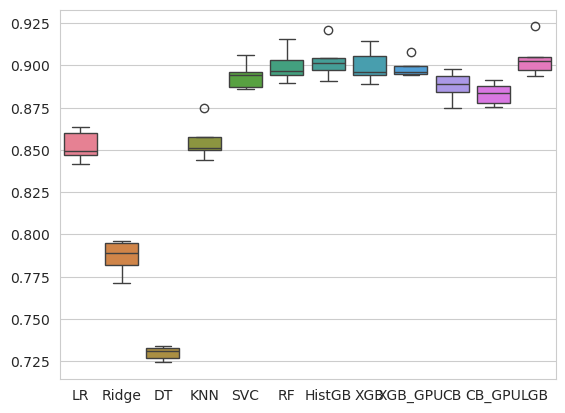

In [13]:
X = pd.read_pickle('../data/processed/X_train_1.pkl.zip')
y = pd.read_pickle('../data/processed/y_train_1.pkl')

results = {}

for name, model in models.items():
    results[name] = eval_model(name, model, X, y)
    
results = pd.DataFrame(results)
sns.boxplot(results);

     LR: 0.692    (0.737 ± 0.045)    1.3s
  Ridge: 0.570    (0.640 ± 0.071)    0.7s
     DT: 0.564    (0.609 ± 0.045)    13.3s
    KNN: 0.648    (0.698 ± 0.050)    0.4s
    SVC: 0.734    (0.773 ± 0.039)    7.6s
     RF: 0.754    (0.773 ± 0.019)    2.1s
 HistGB: 0.755    (0.787 ± 0.032)    33.2s
    XGB: 0.733    (0.776 ± 0.043)    24.2s
XGB_GPU: 0.723    (0.763 ± 0.040)    14.7s
     CB: 0.746    (0.780 ± 0.035)    24.4s
 CB_GPU: 0.747    (0.776 ± 0.029)    13.1s
    LGB: 0.749    (0.781 ± 0.032)    15.0s


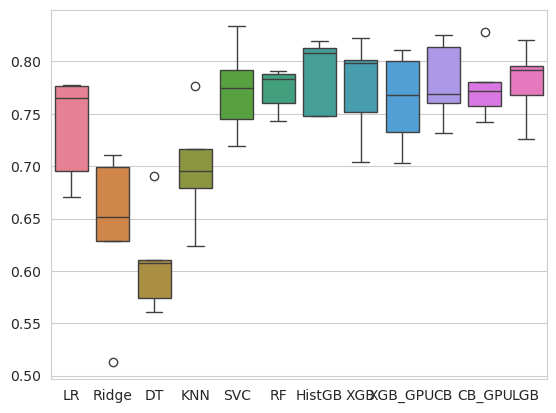

In [14]:
X = pd.read_pickle('../data/processed/X_train_2.pkl.zip')
y = pd.read_pickle('../data/processed/y_train_2.pkl')

results = {}

for name, model in models.items():
    results[name] = eval_model(name, model, X, y)
    
results = pd.DataFrame(results)
sns.boxplot(results);

     LR: 0.886    (0.899 ± 0.013)    1.4s
  Ridge: 0.828    (0.841 ± 0.014)    0.6s
     DT: 0.749    (0.780 ± 0.032)    8.2s
    KNN: 0.875    (0.891 ± 0.015)    0.4s
    SVC: 0.898    (0.912 ± 0.014)    5.7s
     RF: 0.904    (0.920 ± 0.016)    2.0s
 HistGB: 0.901    (0.919 ± 0.018)    33.7s
    XGB: 0.894    (0.915 ± 0.021)    19.8s
XGB_GPU: 0.893    (0.909 ± 0.016)    12.8s
     CB: 0.897    (0.913 ± 0.017)    21.0s
 CB_GPU: 0.903    (0.921 ± 0.018)    12.6s
    LGB: 0.894    (0.916 ± 0.022)    13.4s


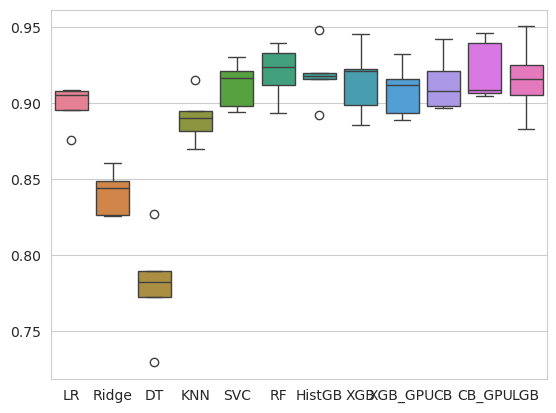

In [15]:
X = pd.read_pickle('../data/processed/X_train_3.pkl.zip')
y = pd.read_pickle('../data/processed/y_train_3.pkl')

results = {}

for name, model in models.items():
    results[name] = eval_model(name, model, X, y)    
    
results = pd.DataFrame(results)
sns.boxplot(results);